In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [23]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [24]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

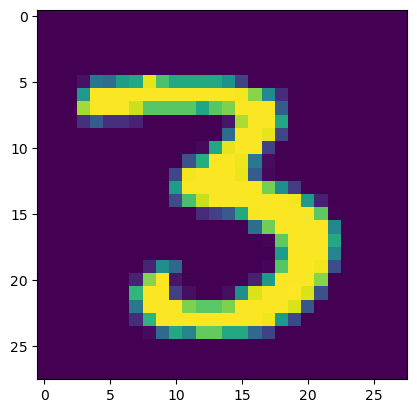

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[12])


In [25]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

# model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Flatten())
# model.add(Dropout(0.25))
# model.add(Dense(10,activation='relu'))


In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [60]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.3)

Epoch 1/15
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1217 - val_accuracy: 0.9817
Epoch 2/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1180 - val_accuracy: 0.9819
Epoch 3/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1339 - val_accuracy: 0.9801
Epoch 4/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.1382 - val_accuracy: 0.9791
Epoch 5/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.1208 - val_accuracy: 0.9807
Epoch 6/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.1444 - val_accuracy: 0.9777
Epoch 7/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1503 - val_accuracy:

In [51]:
model.save("final.h5")

In [52]:
from keras.models import load_model
loadingmodel=load_model("final.h5")

In [53]:
y_prob = loadingmodel.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [54]:
y_pred = y_prob.argmax(axis=1)

In [56]:
s=model.evaluate(X_test,y_test)
print(f"The accuracy of the model is {s[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9729
The accuracy of the model is 0.9728999733924866


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.9729

In [1]:
mytext=str(loadingmodel.predict(X_test[1].reshape(1,28,28)).argmax(axis=1))

NameError: name 'loadingmodel' is not defined